In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
def compute_positive_predictive_value(h1_prior, alpha=0.05, beta=0.2, bias=0):
    
    #P(H0) = P(TrN) = 1 - P(H1) = 1 - P(TrY) = 1 - h1_prior
    h0_prior = 1 - h1_prior
    
    # alpha = P(Accept H1/ H0 is true) = P(RY/TrN)
    # 1 - alpha = P(RN/TN)
    # beta = P(Reject H1/ H1 is true) = P(RN/TrY)
    # power = 1 - beta = P(Accept H1 / H1 is true) = P(RY/TrY)
    power = 1 - beta
    
    # P(True Positive) = P(TP) = P(RY, TrY) = P(RY/TrY)*P(TrY)
    prob_true_positive = power * h1_prior
    
    # P(False Negative) = P(FN) = P(RN, TrY) = P(RN/TrY)*P(TrY)
    prob_false_negative = beta*h1_prior
    
    # P(False Positive) = P(FP) = P(RY, TrN) = P(RY/TrN)*P(TrN)
    prob_false_positive = alpha * h0_prior
    
    # P(True Negative) = P(TN) = P(RN, TrN) = P(RN/TrN)*P(TrN)
    prob_true_negative = (1 - alpha)*h0_prior
    
    # adding impact due to bias
    if bias > 0:
        return adjust_ppv_for_bias(prob_true_positive, 
                        prob_false_negative, 
                        prob_false_positive, 
                        prob_true_negative,
                        bias)
    
    ppv = prob_true_positive/(prob_true_positive + prob_false_positive)
    return (prob_true_positive, 
        prob_false_negative, 
        prob_false_positive, 
        prob_true_negative,
        ppv)
    
    
    
    

In [23]:
def adjust_ppv_for_bias(prob_true_positive, 
                        prob_false_negative, 
                        prob_false_positive, 
                        prob_true_negative,
                        bias):
    '''bias indicates a research finding when there isn't any
       let, 'u' be the proprotion of of probed analysis that would not have been research finding,
       but end up presented and reported as such i.e. 
       i. it indicates proportion of True Negative which would come up as False Positive
       ii. it indicates proportion of False Negative which will show up as True Positive 
    '''
    
    adjust_true_positive = bias*prob_false_negative
    adjust_false_positive = bias*prob_true_negative
    
    prob_true_positive +=adjust_true_positive
    prob_false_negative -=adjust_true_positive
    
    prob_false_positive +=adjust_false_positive
    prob_true_negative -=adjust_false_positive
    
    ppv = prob_true_positive/(prob_true_positive + prob_false_positive)
    
    return [prob_true_positive, prob_false_negative, prob_false_positive, prob_true_negative,ppv]

In [24]:
print(" True Positive {} \n False Negative {} \n False Positive {} \n True Negative{} \n PPV {} \n ".format(
    *compute_positive_predictive_value(0.5)))

 True Positive 0.4 
 False Negative 0.1 
 False Positive 0.025 
 True Negative0.475 
 PPV 0.9411764705882353 
 


In [29]:
compute_positive_predictive_value(0.5, bias=0.1)

[0.41000000000000003, 0.09, 0.07250000000000001, 0.4275, 0.8497409326424871]

In [51]:
compute_positive_predictive_value(0.1,beta=0.5)

(0.05, 0.05, 0.045000000000000005, 0.855, 0.5263157894736842)

In [54]:
compute_positive_predictive_value(0.8, alpha=0.05, beta=0.2)

(0.6400000000000001,
 0.16000000000000003,
 0.009999999999999998,
 0.18999999999999995,
 0.9846153846153846)

In [49]:
def ppv_multiple_pre_study_odd_power_and_bias(power , bias):
    pre_study_odd = np.arange(0,1,0.1)
#     odd = pre_study_odd / (1 - pre_study_odd)
    ppv = [compute_positive_predictive_value(pso, beta=1-power, bias=bias)[-1] for pso in pre_study_odd]

    return pre_study_odd ,ppv    
    

In [43]:
def tp_multiple_pre_study_odd_power_and_bias(power, bias):
    pre_study_odd = np.arange(0,1,0.1)
    tp = [compute_positive_predictive_value(pso, beta=1-power, bias=bias)[0] for pso in pre_study_odd]

    return pre_study_odd , tp    

In [44]:
def fp_multiple_pre_study_odd_power_and_bias(power, bias):
    pre_study_odd = np.arange(0,1,0.1)
    fp = [compute_positive_predictive_value(pso, beta=1-power, bias=bias)[2] for pso in pre_study_odd]

    return pre_study_odd , fp    

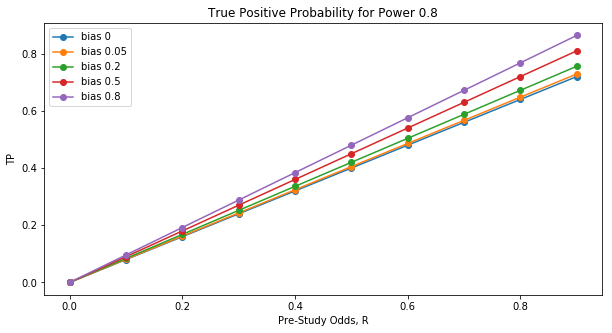

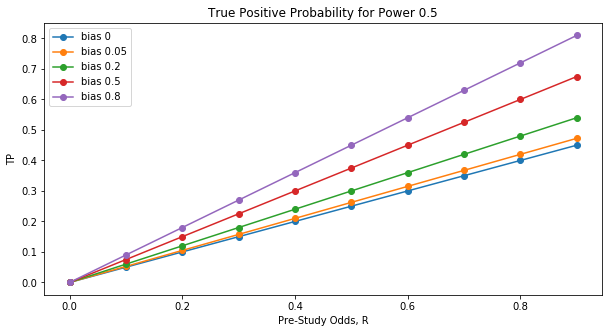

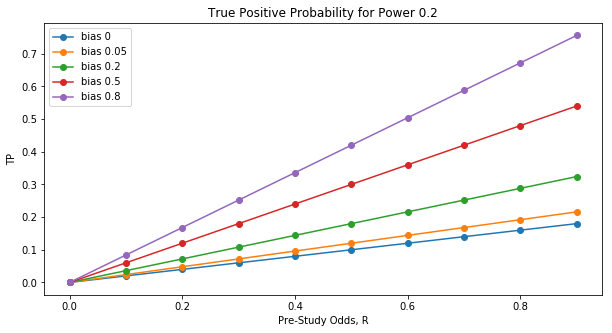

In [45]:
# Plotting TP for various power and bias
for p in [0.8, 0.5, 0.2]:
    plt.figure(figsize=(10,5))
    for b in [0, 0.05, 0.2, 0.5, 0.8]:    
        odd, tp = tp_multiple_pre_study_odd_power_and_bias(power=p, bias=b)
        plt.plot(odd, tp,'-o' ,label="bias {}".format(b))
    plt.xlabel("Pre-Study Odds, R")
    plt.ylabel("TP")
    plt.legend()
    plt.title("True Positive Probability for Power {}".format(p))
    plt.show()

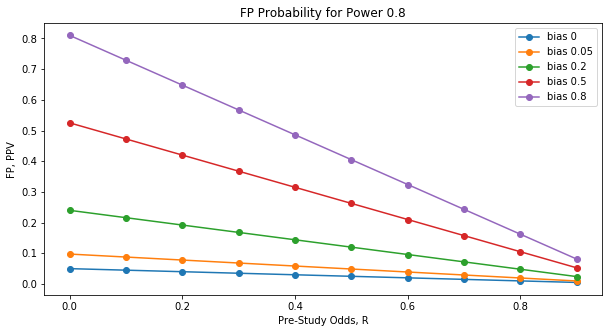

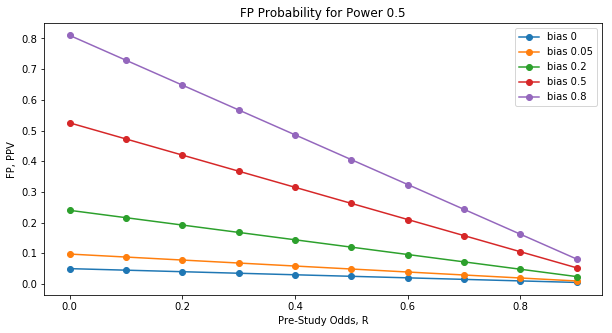

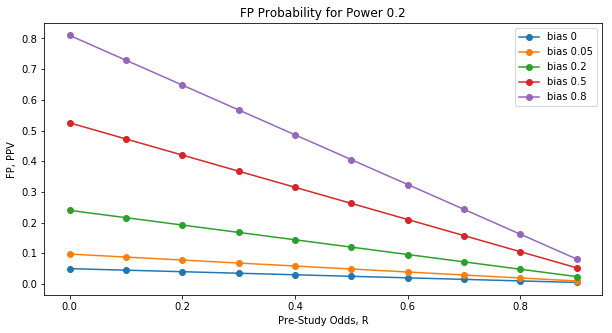

In [46]:
for p in [0.8, 0.5, 0.2]:
    plt.figure(figsize=(10,5))
    for b in [0, 0.05, 0.2, 0.5, 0.8]:    
        odd, fp = fp_multiple_pre_study_odd_power_and_bias(power=p, bias=b)
        plt.plot(odd, fp,'-o' ,label="bias {}".format(b))
    plt.xlabel("Pre-Study Odds, R")
    plt.ylabel("FP, PPV")
    plt.legend()
    plt.title("FP Probability for Power {}".format(p))
    plt.show()

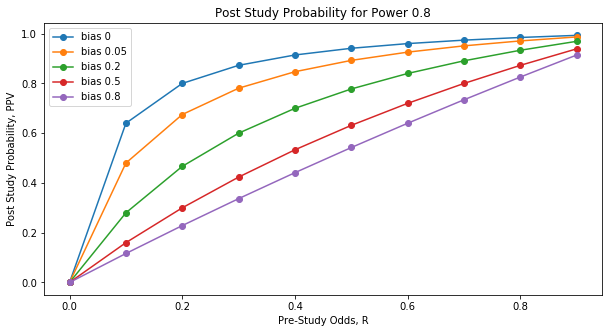

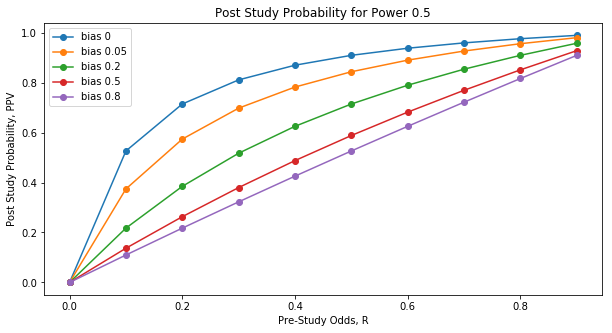

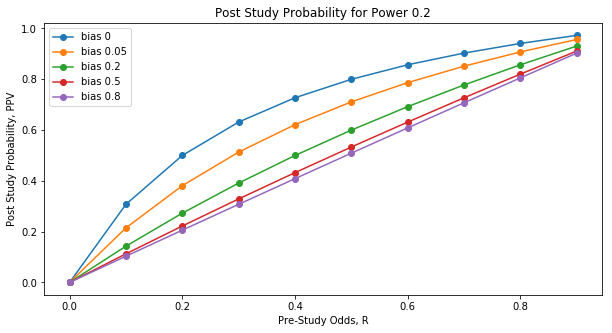

In [50]:
for p in [0.8, 0.5, 0.2]:
    plt.figure(figsize=(10,5))
    for b in [0, 0.05, 0.2, 0.5, 0.8]:    
        odd, ppv = ppv_multiple_pre_study_odd_power_and_bias(power=p, bias=b)
        plt.plot(odd, ppv,'-o' ,label="bias {}".format(b))
    plt.xlabel("Pre-Study Odds, R")
    plt.ylabel("Post Study Probability, PPV")
    plt.legend()
    plt.title("Post Study Probability for Power {}".format(p))
    plt.show()